In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('../data/processed/students_cleaned.csv')
df.head()

,ipv,ips,iaa,ieg,nº_av,ida,defasagem
0,7.278,5.6,8.3,4.1,4.0,4.0,-1
1,6.778,6.3,8.8,5.2,4.0,6.8,0
2,7.556,5.6,0.0,7.9,4.0,5.6,0
3,5.278,5.6,8.8,4.5,4.0,5.0,0
4,7.389,5.6,7.9,8.6,4.0,5.2,0


In [3]:
df.shape

(2846, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ipv        2846 non-null   float64
 1   ips        2846 non-null   float64
 2   iaa        2846 non-null   float64
 3   ieg        2846 non-null   float64
 4   nº_av      2846 non-null   float64
 5   ida        2845 non-null   float64
 6   defasagem  2846 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 155.8 KB


# Target

In [5]:
df['defasagem'] = df['defasagem'].apply(lambda x: 1 if x < 0 else 0)
df.head()

,ipv,ips,iaa,ieg,nº_av,ida,defasagem
0,7.278,5.6,8.3,4.1,4.0,4.0,1
1,6.778,6.3,8.8,5.2,4.0,6.8,0
2,7.556,5.6,0.0,7.9,4.0,5.6,0
3,5.278,5.6,8.8,4.5,4.0,5.0,0
4,7.389,5.6,7.9,8.6,4.0,5.2,0


In [6]:
df['defasagem'].unique()

array([1, 0])

In [7]:
df['defasagem'].value_counts()

defasagem
1    1680
0    1166
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of IPV'}, ylabel='Frequency'>

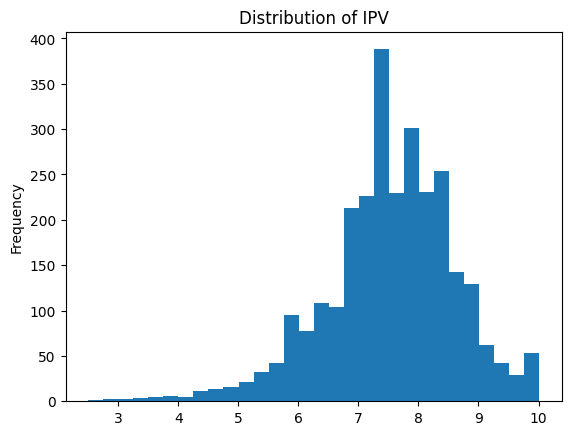

In [8]:
df['ipv'].plot(kind='hist', bins=30, title='Distribution of IPV')

<Axes: title={'center': 'Distribution of ips'}, ylabel='Frequency'>

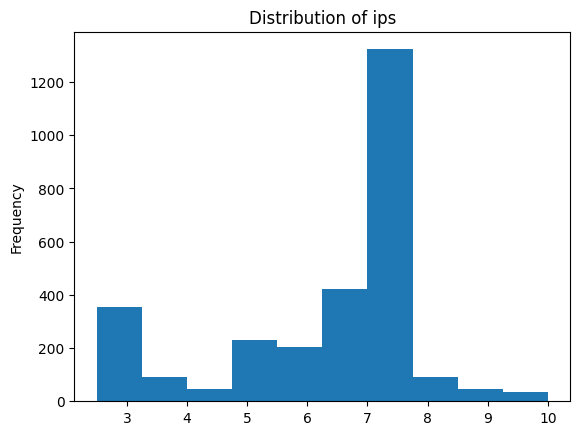

In [9]:
df['ips'].plot(kind='hist', bins=10, title='Distribution of ips')

<Axes: title={'center': 'Distribution of iaa'}, ylabel='Frequency'>

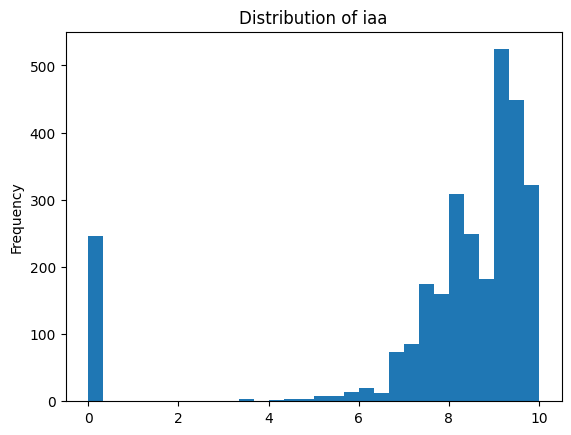

In [10]:
df['iaa'].plot(kind='hist', bins=30, title='Distribution of iaa')

<Axes: title={'center': 'Distribution of ieg'}, ylabel='Frequency'>

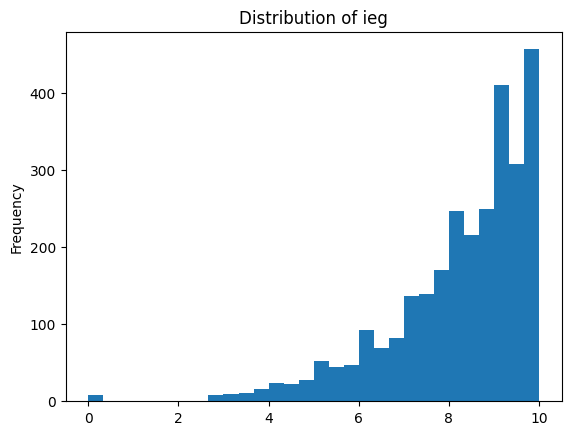

In [11]:
df['ieg'].plot(kind='hist', bins=30, title='Distribution of ieg')

<Axes: title={'center': 'Distribution of nº_av'}, ylabel='Frequency'>

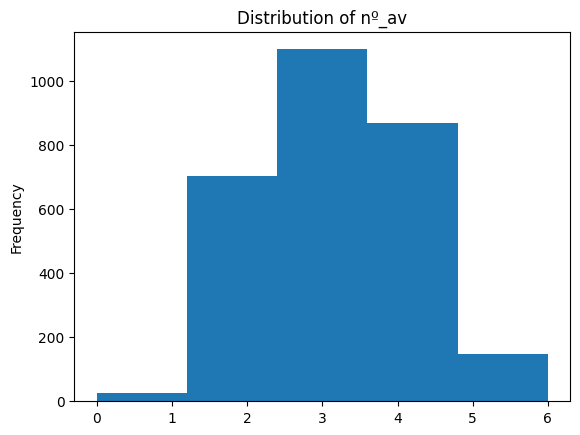

In [12]:
df['nº_av'].plot(kind='hist', bins=5, title='Distribution of nº_av')

<Axes: title={'center': 'Distribution of ida'}, ylabel='Frequency'>

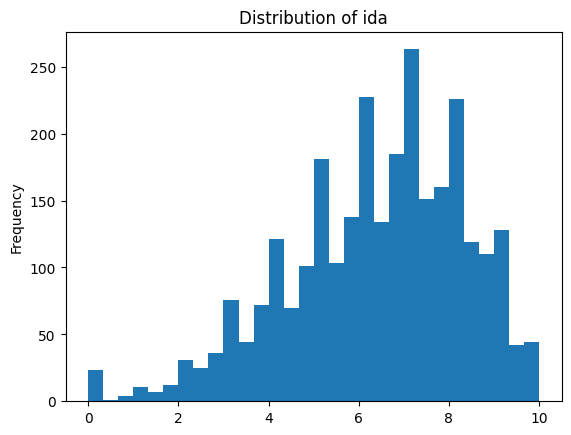

In [13]:
df['ida'].plot(kind='hist', bins=30, title='Distribution of ida')

In [14]:
def average_by_line(df):
    df["media"] = df.mean(axis=1)
    return df


In [15]:
df = average_by_line(df)
df.head()

,ipv,ips,iaa,ieg,nº_av,ida,defasagem,media
0,7.278,5.6,8.3,4.1,4.0,4.0,1,4.896857
1,6.778,6.3,8.8,5.2,4.0,6.8,0,5.411143
2,7.556,5.6,0.0,7.9,4.0,5.6,0,4.379429
3,5.278,5.6,8.8,4.5,4.0,5.0,0,4.739714
4,7.389,5.6,7.9,8.6,4.0,5.2,0,5.527000


In [16]:
# Renomeia coluna problemática antes de qualquer coisa
if "nº_av" in df.columns:
    df = df.rename(columns={"nº_av": "no_av"})

df.dropna(inplace=True, axis=0)

df.to_csv('../data/processed/students_feature_engineering.csv', index=False)


In [17]:
df.head()

,ipv,ips,iaa,ieg,no_av,ida,defasagem,media
0,7.278,5.6,8.3,4.1,4.0,4.0,1,4.896857
1,6.778,6.3,8.8,5.2,4.0,6.8,0,5.411143
2,7.556,5.6,0.0,7.9,4.0,5.6,0,4.379429
3,5.278,5.6,8.8,4.5,4.0,5.0,0,4.739714
4,7.389,5.6,7.9,8.6,4.0,5.2,0,5.527000
